## Machine Learning: Classification Algorithm-Breast Cancer

#### Classification in machine learning and statistics is a supervised learning approach in which the computer program learns from the data given to it and make new observations or classifications. Classification is a process of categorizing a given set of data into classes, It can be performed on both structured or unstructured data. The process starts with predicting the class of given data points. The classes are often referred to as target, label or categories. The classification predictive modeling is the task of approximating the mapping function from input variables to discrete output variables. The main goal is to identify which class/category the new data will fall into. Classification algorithms are used to predict the discrete output variables such as spam or not-spam, yes or no, heart disease or Not heart disease etc.

#### Classification Algorithm we used in this data:
- Logistic Regression
- Naive Bayes Classifier
- K-Nearest Neighbor
- Support Vector Machine
- Decision Tree
- Random Forest 
- XGBoost
- Artificial Neural Network(ANN)

## Problem Analysis

#### - We run all the classification models mention above with or without SMOTE, get best parameters, cross validate to check overfitting, use metrics(Accuracy, Precision, Recall and F-1) to check if model is good in unbalanced data.
#### - This breast cancer dataset is from  UCI machine learning repository and was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg. 

   ###  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
   10. Mitoses                       1 - 10
   11. Class:                        (2 for benign, 4 for malignant)
  
#### - In this dataset we have 683 rows and 11 columns. The 10 independent variables learn the correlations with that dependent feature class variable predicting if the tumor is benign(2) or malignant(4). 
#### 


## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Importing the dataset

In [2]:
dataset_BC = pd.read_csv('breast-cancer.csv')

In [3]:
dataset_BC

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


#### 683 rows × 11 columns

In [4]:
dataset_BC.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

#### no null values noted

In [5]:
dataset_BC.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [6]:
dataset_BC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [7]:
dataset_BC.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
dataset_BC.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [9]:
dataset_BC['Class'] = dataset_BC['Class'].astype(str)

In [10]:
dataset_BC['Class'] = dataset_BC['Class'].str.replace('2', '0').str.replace('4', '1')
dataset_BC['Class']

0      0
1      0
2      0
3      0
4      0
      ..
678    0
679    0
680    1
681    1
682    1
Name: Class, Length: 683, dtype: object

#### Change 2 to 0 for benign 
#### Change 4 to 1 for malignant.

In [11]:
dataset_BC['Class'] = dataset_BC['Class'].astype(int)

In [12]:
#Check the datatype object unique number of values
categorical = dataset_BC.select_dtypes(include='int64')
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

Sample code number
630
Clump Thickness
10
Uniformity of Cell Size
10
Uniformity of Cell Shape
10
Marginal Adhesion
10
Single Epithelial Cell Size
10
Bare Nuclei
10
Bland Chromatin
10
Normal Nucleoli
10
Mitoses
9


In [13]:
dataset_BC['Class'].unique()

array([0, 1])

In [14]:
#Check classification label division
dataset_BC['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

In [15]:
#Drop some repeated column
dataset_BC.drop(['Sample code number'], 1, inplace=True)


In [16]:
dataset_BC.shape

(683, 10)

## Conducting Exploratory Data Analysis (EDA) to understand our data better

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


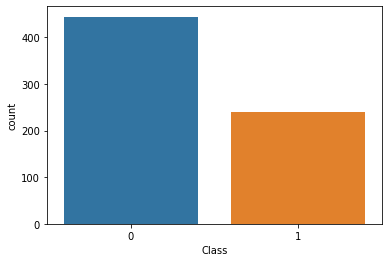

In [17]:
#Univariate Analysis Target
sns.countplot(dataset_BC['Class'])

#### we can see that the classification label division is unbalance, we have 444 benigh(0) and 239 malignant(1). We will not apply SMOTE to compare what the difference with SMOTE. We run in other jupyter notebook the data with SMOTE, result is listed below. 

## Splitting the dataset into the Training set and Test set

In [19]:
from sklearn.model_selection import train_test_split
X = dataset_BC.iloc[:, :-1].values
y = dataset_BC.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [21]:
X_train_sc

array([[ 1.98839518, -0.69781134, -0.74152574, ...,  0.61907387,
         0.34532102, -0.33863738],
       [-1.22468404, -0.69781134, -0.74152574, ..., -0.18860673,
        -0.62157783, -0.33863738],
       [ 0.20335117, -0.69781134, -0.74152574, ..., -0.18860673,
        -0.62157783, -0.33863738],
       ...,
       [-1.22468404, -0.69781134, -0.74152574, ..., -0.99628733,
        -0.62157783, -0.33863738],
       [-0.51066644, -0.69781134, -0.74152574, ..., -0.59244703,
        -0.62157783, -0.33863738],
       [ 1.98839518,  1.90512627,  1.27779124, ...,  1.42675446,
         1.31221987, -0.33863738]])

In [22]:
X_test_sc

array([[-1.22468404, -0.69781134, -0.74152574, ..., -0.99628733,
        -0.62157783, -0.33863738],
       [-0.51066644, -0.69781134, -0.74152574, ..., -0.59244703,
        -0.62157783, -0.33863738],
       [ 0.20335117,  0.60365746,  0.60468558, ...,  0.21523357,
         0.0230214 , -0.33863738],
       ...,
       [-0.15365763, -0.69781134, -0.74152574, ..., -0.99628733,
        -0.62157783, -0.33863738],
       [-0.15365763,  2.23049348,  0.26813275, ...,  2.23443506,
         2.27911872, -0.33863738],
       [-0.86767524, -0.69781134, -0.74152574, ..., -0.59244703,
        -0.62157783, -0.33863738]])

## 1. Training the Logistic Regression model on the Training set

In [23]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state = 0)
classifier_LR.fit(X_train_sc, y_train)

LogisticRegression(random_state=0)

## Making the Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
y_pred_LR = classifier_LR.predict(X_test_sc)
cm_LR = confusion_matrix(y_test, y_pred_LR)
print("CONFUSION MATRIX: \n", cm_LR)
print()
print("ACCURACY: {:.2f} %".format(accuracy_score(y_test, y_pred_LR)*100))
print("PRECISION: {:.2f} %".format(precision_score(y_test, y_pred_LR)*100))
print("RECALL: {:.2f} %".format(recall_score(y_test, y_pred_LR)*100))
print("F1-SCORE: {:.2f} %".format(f1_score(y_test, y_pred_LR)*100))

CONFUSION MATRIX: 
 [[84  3]
 [ 3 47]]

ACCURACY: 95.62 %
PRECISION: 94.00 %
RECALL: 94.00 %
F1-SCORE: 94.00 %


In [25]:

print(np.concatenate((y_pred_LR.reshape(len(y_pred_LR),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]


In [26]:
df_val_LR = pd.DataFrame({'Predicted Values': y_pred_LR.round(2), 'Real Values':  y_test})
df_val_LR

,Predicted Values,Real Values
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
132,1,1
133,0,0
134,0,0
135,1,1


In [27]:
df_val_LR[df_val_LR['Predicted Values']==1]

,Predicted Values,Real Values
2,1,1
3,1,1
7,1,1
10,1,1
12,1,1
16,1,1
17,1,1
18,1,1
22,1,1
24,1,1


In [28]:
df_val_LR['Predicted Values'].value_counts()

0    87
1    50
Name: Predicted Values, dtype: int64

In [29]:
df_val_LR['Real Values'].value_counts()

0    87
1    50
Name: Real Values, dtype: int64

Accuracy, Precision, and Recall are all critical metrics that are utilized to measure the efficacy of a classification model.

## Applying k-Fold Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score
accuracies_K_FOLD_LR = cross_val_score(estimator = classifier_LR, X = X_train_sc, y = y_train, cv = 5)
print("CROSS VALIDATION: ", (accuracies_K_FOLD_LR))
print("AVERAGE ACCURACY: {:.2f} %".format(accuracies_K_FOLD_LR.mean()*100))
print("STANDARD DEVIATION: {:.2f} %".format(accuracies_K_FOLD_LR.std()*100))

CROSS VALIDATION:  [0.95454545 0.98165138 0.98165138 0.96330275 0.95412844]
AVERAGE ACCURACY: 96.71 %
STANDARD DEVIATION: 1.24 %


## Applying Grid Search to find the best model and the best parameters

from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.001,0.01,0.1,1,10,100]}]
grid_search = GridSearchCV(estimator = classifier_LR,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train_sc, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

- W/O SMOTE Applied: CV=5, Best Accuracy: 97.07 %, Best Parameters: {'C': 0.1}
- W/O SMOTE Applied: CV=10, Best Accuracy: 96.88 %, Best Parameters: {'C': 0.1}
- WITH SMOTE: CV=5, Best Accuracy: 97.04 %, Best Parameters: {'C': 0.01}
- WITH SMOTE: CV=10, Best Accuracy: 97.07 %, Best Parameters: {'C': 0.1}

#### After experimenting with SMOTE(balanced class),  W/O SMOTE(unbalanced data) and Cross-Validate it with 5 and 10 set of data, it is observed in the result above that there is a about 1% increase when class data is balance. The Logistic Regression can work well on the data even with or with out SMOTE applied.

In [31]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(C = 0.1, random_state = 0)
classifier_LR.fit(X_train_sc, y_train)

LogisticRegression(C=0.1, random_state=0)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
y_pred_LR = classifier_LR.predict(X_test_sc)
cm_LR = confusion_matrix(y_test, y_pred_LR)
print("CONFUSION MATRIX: \n", cm_LR)
print()
print("ACCURACY: {:.2f} %".format(accuracy_score(y_test, y_pred_LR)*100))
print("PRECISION: {:.2f} %".format(precision_score(y_test, y_pred_LR)*100))
print("RECALL: {:.2f} %".format(recall_score(y_test, y_pred_LR)*100))
print("F1-SCORE: {:.2f} %".format(f1_score(y_test, y_pred_LR)*100))

CONFUSION MATRIX: 
 [[84  3]
 [ 3 47]]

ACCURACY: 95.62 %
PRECISION: 94.00 %
RECALL: 94.00 %
F1-SCORE: 94.00 %


https://shiffdag.medium.com/what-is-accuracy-precision-and-recall-and-why-are-they-important-ebfcb5a10df2#:~:text=Accuracy%2C%20Precision%2C%20and%20Recall%20are%20all%20critical%20metrics,to%20measure%20the%20efficacy%20of%20a%20classification%20model.

#### Accuracy is 95.62% that means that from the 137 tumors test set, 95.62%(131) is correctly classified and 6 is incorrectly classified. Of the 137 tumor test set sample, 87 is benigh and 50 is malignant. The model correctly identified 84 of the benign and identified correctly 47 of the malignant. Let us check the precision, recall and F1-Score if it work well with unbalanced data.
#### Precision is 94%, when it classifies a tumor to be malignant, it is correct 94% of the time.
#### Recall is also 94%, It classifies 94% of the malignant tumors.
#### F1-Score is also 94% as it is the harmonic mean of the precision and Recall. 
#### Accuracy is a useful metric only when you have an equal distribution of classes on your classification. But base on the result of precision, recall and f1-score w/c is 94% the model perform well on this unbalanced data. This shows that Logistic Model is  a good model even though there is a class imbalanced data set.

## Applying k-Fold Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_LR, X = X_train_sc, y = y_train, cv = 5)
print("CROSS VALIDATION: ", (accuracies))
print("AVERAGE ACCURACY: {:.2f} %".format(accuracies.mean()*100))
print("STANDARD DEVIATION: {:.2f} %".format(accuracies.std()*100))


CROSS VALIDATION:  [0.95454545 0.99082569 0.98165138 0.96330275 0.96330275]
AVERAGE ACCURACY: 97.07 %
STANDARD DEVIATION: 1.34 %


CROSS VALIDATION:  [0.94545455 0.96363636 0.98181818 1.         0.96363636 1.
 0.94444444 0.96296296 0.98148148 0.94444444]
AVERAGE ACCURACY: 96.88 %
STANDARD DEVIATION: 2.02 %

#### Average Accuracy increase from 96.71 % to 97.07 after applying best parameters.
#### As shown above, the Cross Validation randomly split the data into 5 approximately equal size and accuracy in each set is calculated. We can see that Linear Regression model perform well on each of the 5 divided dataset. The accuracy of each 5 set of data is near each other and above 95%, each average value is plus or minus 1.34 of the average accuracy of 97.07f%. There is no overfitting noted, model overfits the data when it will give high accuracy on training data and low score on test set or unseen data. This helps us assess how well our model generalizes/perform on new datasets or unseen data and to avoid overfitting.

## 2. Training the Decision Tree Classification model on the Training set

In [34]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_DT.fit(X_train_sc, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Making the Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_DT = classifier_DT.predict(X_test_sc)
cm_DT = confusion_matrix(y_test, y_pred_DT)
print("CONFUSION MATRIX: \n", cm_DT)
print("ACCURACY: {:.2f} %".format(accuracy_score(y_test, y_pred_DT)*100))
print("PRECISION: {:.2f} %".format(precision_score(y_test, y_pred_DT)*100))
print("RECALL: {:.2f} %".format(recall_score(y_test, y_pred_DT)*100))
print("F1-SCORE: {:.2f} %".format(f1_score(y_test, y_pred_DT)*100))

CONFUSION MATRIX: 
 [[84  3]
 [ 3 47]]
ACCURACY: 95.62 %
PRECISION: 94.00 %
RECALL: 94.00 %
F1-SCORE: 94.00 %


#### same result as from the logistic regression

## Applying k-Fold Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_DT, X = X_train_sc, y = y_train, cv = 5)
print("CROSS VALIDATION: ", (accuracies))
print("AVERAGE ACCURACY: {:.2f} %".format(accuracies.mean()*100))
print("STANDARD DEVIATION: {:.2f} %".format(accuracies.std()*100))

CROSS VALIDATION:  [0.90909091 0.94495413 0.94495413 0.91743119 0.93577982]
AVERAGE ACCURACY: 93.04 %
STANDARD DEVIATION: 1.47 %


## Applying Grid Search to find the best model and the best parameters

from sklearn.model_selection import GridSearchCV
parameters = [{'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,8,10,12]}]
grid_search = GridSearchCV(estimator = classifier_DT,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train_sc, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

- W/O SMOTE Applied: CV=5, Best Accuracy: 94.69 % Best Parameters: {'criterion': 'gini', 'max_depth': 4}
- W/O SMOTE Applied: CV=10, Best Accuracy: 94.87 % Best Parameters: {'criterion': 'gini', 'max_depth': 4}
- WITH SMOTE: CV=5, Best Accuracy: 96.76 % Best Parameters: {'criterion': 'entropy', 'max_depth': 4}
- WITH SMOTE: CV=10, Best Accuracy: 96.55 % Best Parameters: {'criterion': 'entropy', 'max_depth': 4}

#### The Decision Tree Model also work well on the data even with or with out SMOTE applied. After experimenting with SMOTE(balanced class),  W/O SMOTE(unbalanced data) and Cross-Validate it with 5 and 10 set of data, it is observed that there is only about 2% accuracy higher when SMOTE is applied.

In [37]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion = 'gini', max_depth= 4, random_state = 0)
classifier_DT.fit(X_train_sc, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_DT = classifier_DT.predict(X_test_sc)
cm_DT = confusion_matrix(y_test, y_pred_DT)
print("CONFUSION MATRIX: \n", cm_DT)
print()
print("ACCURACY: {:.2f} %".format(accuracy_score(y_test, y_pred_DT)*100))
print("PRECISION: {:.2f} %".format(precision_score(y_test, y_pred_DT)*100))
print("RECALL: {:.2f} %".format(recall_score(y_test, y_pred_DT)*100))
print("F1-SCORE: {:.2f} %".format(f1_score(y_test, y_pred_DT)*100))

CONFUSION MATRIX: 
 [[81  6]
 [ 2 48]]

ACCURACY: 94.16 %
PRECISION: 88.89 %
RECALL: 96.00 %
F1-SCORE: 92.31 %


#### Accuracy is 94.16% that means that from the 137 tumors test set, 94.16%(128) is correctly classified and 8 is incorrectly classified. Of the 137 tumor test set sample, 83 is benigh and 54 is malignant. The model correctly identified 81 of the benign and identified correctly 48 of the malignant. Let us check the precision, recall and F1-Score if it work well with unbalanced data.
#### Precision is 88.89%, when it classifies a tumor to be malignant, it is correct 88.89% of the time.
#### Recall is also 96%, It classifies 96% of the malignant tumors.
#### F1-Score is also 92% as it is the harmonic mean of the precision and Recall. 
#### Accuracy is a goog metric when you have an equal distribution of classes on your classification. But base on the result of precision, recall and f1-score w/c is 92.31 the Decision Tree Model perform little bit well on this unbalanced data. Precision is a little bit lower.

In [39]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_DT, X = X_train_sc, y = y_train, cv = 5)
print("CROSS VALIDATION: ", (accuracies))
print("AVERAGE ACCURACY: {:.2f} %".format(accuracies.mean()*100))
print("STANDARD DEVIATION: {:.2f} %".format(accuracies.std()*100))

CROSS VALIDATION:  [0.92727273 0.97247706 0.95412844 0.93577982 0.94495413]
AVERAGE ACCURACY: 94.69 %
STANDARD DEVIATION: 1.56 %


Hyperparameter tuning is searching the hyperparameter space for a set of values that will optimize your model architecture.

#### The accuracy increase from 93.04 % to 94.69 after applying best parameter.
#### As shown above, the Cross Validation randomly split the data into 5 approximately equal size and accuracy in each set is calculated. We can see that Decision Tree model perform well on each of the 5 divided dataset. The accuracy of each 5 set of data is near each other and above 92%, each average value is plus or minus 1.56 of the average accuracy of 94.69%. There is no overfitting noted, model overfits the data when it will give high accuracy on training data and low score on test set or unseen data. This helps us assess how well our model generalizes/perform on new datasets or unseen data and to avoid overfitting.

## 3. Training the K-NN model on the Training set

In [40]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_KNN.fit(X_train_sc, y_train)

KNeighborsClassifier()

## Making the Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_KNN = classifier_KNN.predict(X_test_sc)
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
print("CONFUSION MATRIX: \n", cm_KNN)
print("ACCURACY: {:.2f} %".format(accuracy_score(y_test, y_pred_KNN)*100))
print("PRECISION: {:.2f} %".format(precision_score(y_test, y_pred_KNN)*100))
print("RECALL: {:.2f} %".format(recall_score(y_test, y_pred_KNN)*100))
print("F1-SCORE: {:.2f} %".format(f1_score(y_test, y_pred_KNN)*100))

CONFUSION MATRIX: 
 [[83  4]
 [ 2 48]]
ACCURACY: 95.62 %
PRECISION: 92.31 %
RECALL: 96.00 %
F1-SCORE: 94.12 %


## Applying k-Fold Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_KNN, X = X_train_sc, y = y_train, cv = 5)
print("CROSS VALIDATION: ", (accuracies))
print("AVERAGE ACCURACY: {:.2f} %".format(accuracies.mean()*100))
print("STANDARD DEVIATION: {:.2f} %".format(accuracies.std()*100))

CROSS VALIDATION:  [0.94545455 0.99082569 0.97247706 0.96330275 0.96330275]
AVERAGE ACCURACY: 96.71 %
STANDARD DEVIATION: 1.48 %


## Applying Grid Search to find the best model and the best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'leaf_size': list(range(1,50)), 'n_neighbors': list(range(1,30)), 'p': [1,2]}]
grid_search = GridSearchCV(estimator = classifier_KNN,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train_sc, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 97.44 %
Best Parameters: {'leaf_size': 1, 'n_neighbors': 9, 'p': 2}

- W/O SMOTE Applied: CV=5, 
- W/O SMOTE Applied: CV=10, Best Accuracy: 97.44 % Best Parameters: {'leaf_size': 1, 'n_neighbors': 9, 'p': 2}
- WITH SMOTE: CV=5, Best Accuracy: 98.31 % Best Parameters: {'leaf_size': 1, 'n_neighbors': 7, 'p': 2}
- WITH SMOTE: CV=10, Best Accuracy: 98.20 % Best Parameters: {'leaf_size': 1, 'n_neighbors': 3, 'p': 1}

Best Accuracy: 97.44 %
Best Parameters: {'leaf_size': 1, 'n_neighbors': 9, 'p': 2}

Best Accuracy: 98.31 %
Best Parameters: {'leaf_size': 1, 'n_neighbors': 7, 'p': 2}

Best Accuracy: 98.20 %
Best Parameters: {'leaf_size': 1, 'n_neighbors': 3, 'p': 1}

#### After experimenting KNN model with SMOTE(balanced class), W/O SMOTE(unbalanced data) and Cross-Validate it with 5 and 10 set of data, it is observed that there is only about 1% average accuracy higher when SMOTE is applied.¶

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

list(range(1,50))

In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 9,leaf_size = 1, metric = 'minkowski', p = 2)
classifier_KNN.fit(X_train_sc, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=9)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_KNN = classifier_KNN.predict(X_test_sc)
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
print("CONFUSION MATRIX: \n", cm_KNN)
print()
print("ACCURACY: {:.2f} %".format(accuracy_score(y_test, y_pred_KNN)*100))
print("PRECISION: {:.2f} %".format(precision_score(y_test, y_pred_KNN)*100))
print("RECALL: {:.2f} %".format(recall_score(y_test, y_pred_KNN)*100))
print("F1-SCORE: {:.2f} %".format(f1_score(y_test, y_pred_KNN)*100))


CONFUSION MATRIX: 
 [[84  3]
 [ 3 47]]

ACCURACY: 95.62 %
PRECISION: 94.00 %
RECALL: 94.00 %
F1-SCORE: 94.00 %


#### We can see that nothing change in accuracy, precision, recall even though we applied best parameter. 
#### Accuracy is 95.62% that means that from the 137 tumors test set, 95.62%(131) is correctly classified and 6 is incorrectly classified. Of the 137 tumor test set sample, 87 is benigh and 50 is malignant. The model correctly identified 84 of the benign and identified correctly 47 of the malignant. Let us check the precision, recall and F1-Score if it work well with unbalanced data.
#### Precision is 94%, when it classifies a tumor to be malignant, it is correct 94% of the time.
#### Recall is also 94%, It classifies 94% of the malignant tumors.
#### F1-Score is also 94% as it is the harmonic mean of the precision and Recall. 
#### Accuracy is a good metric when you have an equal distribution of classes on your classification. But base on the result of precision, recall and f1-score w/c is 94% the model perform well on this unbalanced data. This shows that KNN Model is  a good model on this data even though there is a class imbalanced data set.

In [45]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_KNN, X = X_train_sc, y = y_train, cv = 5)
print("CROSS VALIDATION: ", (accuracies))
print("AVERAGE ACCURACY: {:.2f} %".format(accuracies.mean()*100))
print("STANDARD DEVIATION: {:.2f} %".format(accuracies.std()*100))

CROSS VALIDATION:  [0.95454545 0.99082569 0.98165138 0.97247706 0.97247706]
AVERAGE ACCURACY: 97.44 %
STANDARD DEVIATION: 1.20 %


https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f

#### Average accuracy increase from 96.71 % from 97.44% after applying the best parameter.
#### As shown above, the Cross Validation randomly split the data into 5 approximately equal size and accuracy in each set is calculated. We can see that KNN model perform well on each of the 5 divided dataset. The accuracy of each 5 set of data is near each other and above 95%, each average value is plus or minus 1.20 of the average accuracy of 97.44%. There is no overfitting noted, model overfits the data when it will give high accuracy on training data and low score on test set or unseen data. This helps us assess how well our model generalizes/perform on new datasets or unseen data and to avoid overfitting.

## 4. Training the SVM model on the Training set

In [46]:
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'linear', random_state = 0)
classifier_SVM.fit(X_train_sc, y_train)

SVC(kernel='linear', random_state=0)

## Making the Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_SVM = classifier_SVM.predict(X_test_sc)
cm_SVM = confusion_matrix(y_test, y_pred_SVM)
print("CONFUSION MATRIX: \n", cm_SVM)
print()
print("ACCURACY: {:.2f} %".format(accuracy_score(y_test, y_pred_SVM)*100))
print("PRECISION: {:.2f} %".format(precision_score(y_test, y_pred_SVM)*100))
print("RECALL: {:.2f} %".format(recall_score(y_test, y_pred_SVM)*100))
print("F1-SCORE: {:.2f} %".format(f1_score(y_test, y_pred_SVM)*100))


CONFUSION MATRIX: 
 [[83  4]
 [ 2 48]]

ACCURACY: 95.62 %
PRECISION: 92.31 %
RECALL: 96.00 %
F1-SCORE: 94.12 %


## Applying k-Fold Cross Validation

In [48]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_SVM, X = X_train, y = y_train, cv = 5)
print("CROSS VALIDATION: ", (accuracies))
print("AVERAGE ACCURACY: {:.2f} %".format(accuracies.mean()*100))
print("STANDARD DEVIATION: {:.2f} %".format(accuracies.std()*100))

CROSS VALIDATION:  [0.95454545 0.98165138 0.97247706 0.97247706 0.97247706]
AVERAGE ACCURACY: 97.07 %
STANDARD DEVIATION: 0.88 %


## Applying Grid Search to find the best model and the best parameters

Best parameter is done in the Kernel SVM model

## 5. Training the Kernel SVM model on the Training set

In [49]:
from sklearn.svm import SVC
classifier_KSVM = SVC(kernel = 'rbf', random_state = 0)
classifier_KSVM.fit(X_train_sc, y_train)

SVC(random_state=0)

## Making the Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_KSVM = classifier_KSVM.predict(X_test_sc)
cm_KSVM = confusion_matrix(y_test, y_pred_KSVM)
print("CONFUSION MATRIX: \n", cm_KSVM)
print()
print("ACCURACY: {:.2f} %".format(accuracy_score(y_test, y_pred_KSVM)*100))
print("PRECISION: {:.2f} %".format(precision_score(y_test, y_pred_KSVM)*100))
print("RECALL: {:.2f} %".format(recall_score(y_test, y_pred_KSVM)*100))
print("F1-SCORE: {:.2f} %".format(f1_score(y_test, y_pred_KSVM)*100))


CONFUSION MATRIX: 
 [[82  5]
 [ 1 49]]

ACCURACY: 95.62 %
PRECISION: 90.74 %
RECALL: 98.00 %
F1-SCORE: 94.23 %


## Applying k-Fold Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_KSVM, X = X_train_sc, y = y_train, cv = 5)
print("CROSS VALIDATION: ", (accuracies))
print("AVERAGE ACCURACY: {:.2f} %".format(accuracies.mean()*100))
print("STANDARD DEVIATION: {:.2f} %".format(accuracies.std()*100))

CROSS VALIDATION:  [0.94545455 0.98165138 0.98165138 0.97247706 0.97247706]
AVERAGE ACCURACY: 97.07 %
STANDARD DEVIATION: 1.33 %


## Applying Grid Search to find the best model and the best parameters

from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier_KSVM,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train_sc, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 97.07 %
Best Parameters: {'C': 0.75, 'gamma': 0.1, 'kernel': 'rbf'}

- W/O SMOTE Applied: CV=5, Best Accuracy: 97.07 % Best Parameters: {'C': 0.75, 'gamma': 0.1, 'kernel': 'rbf'
- WITH SMOTE: CV=5, Best Accuracy: 97.61 % Best Parameters: {'C': 1, 'gamma': 0.6, 'kernel': 'rbf'}
- WITH SMOTE: CV=10, Best Accuracy: 97.27 % Best Parameters: {'C': 0.5, 'kernel': 'linear'}

Best Accuracy: 97.07 %
Best Parameters: {'C': 0.75, 'gamma': 0.1, 'kernel': 'rbf'


Best Accuracy: 97.61 %
Best Parameters: {'C': 1, 'gamma': 0.6, 'kernel': 'rbf'}

Best Accuracy: 97.27 %
Best Parameters: {'C': 0.5, 'kernel': 'linear'}

#### The Kernel SVM Model also work well on the data even with or with out SMOTE applied. After experimenting with SMOTE(balanced class), W/O SMOTE(unbalanced data) and Cross-Validate it with 5 and 10 set of data, it is observed that there is no change when SMOTE is applied..¶

In [52]:
from sklearn.svm import SVC
classifier_KSVM = SVC(C=0.75, kernel = 'rbf', gamma =0.1, random_state = 0)
classifier_KSVM.fit(X_train_sc, y_train)

SVC(C=0.75, gamma=0.1, random_state=0)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_KSVM = classifier_KSVM.predict(X_test_sc)
cm_KSVM = confusion_matrix(y_test, y_pred_KSVM)
print("CONFUSION MATRIX: \n", cm_KSVM)
print()
print("ACCURACY: {:.2f} %".format(accuracy_score(y_test, y_pred_KSVM)*100))
print("PRECISION: {:.2f} %".format(precision_score(y_test, y_pred_KSVM)*100))
print("RECALL: {:.2f} %".format(recall_score(y_test, y_pred_KSVM)*100))
print("F1-SCORE: {:.2f} %".format(f1_score(y_test, y_pred_KSVM)*100))


CONFUSION MATRIX: 
 [[82  5]
 [ 1 49]]

ACCURACY: 95.62 %
PRECISION: 90.74 %
RECALL: 98.00 %
F1-SCORE: 94.23 %


#### Accuracy is 95.62% that means that from the 137 tumors test set, 95.62%(131) is correctly classified and 6 is incorrectly classified. Of the 137 tumor test set sample, 83 is benigh and 54 is malignant. The model correctly identified 82 of the benign and identified correctly 49 of the malignant. Let us check the precision, recall and F1-Score if it work well with unbalanced data.
#### Precision is 90.74%, when it classifies a tumor to be malignant, it is correct 90.74% of the time.
#### Recall is also 98%, It classifies 98% of the malignant tumors.
#### F1-Score is also 94.23% as it is the harmonic mean of the precision and Recall. 
#### Accuracy is a useful metric only when you have an equal distribution of classes on your classification. But base on the result of precision, recall and f1-score w/c is 94.23% the model perform well on this unbalanced data. This shows that SVM Model is  a good model on this particular data  even though there is a class imbalanced data set.

In [54]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_KSVM, X = X_train_sc, y = y_train, cv = 5)
print("CROSS VALIDATION: ", (accuracies))
print("AVERAGE ACCURACY: {:.2f} %".format(accuracies.mean()*100))
print("STANDARD DEVIATION: {:.2f} %".format(accuracies.std()*100))

CROSS VALIDATION:  [0.94545455 0.98165138 0.98165138 0.97247706 0.97247706]
AVERAGE ACCURACY: 97.07 %
STANDARD DEVIATION: 1.33 %


#### Average accuracy 97.07 didn't change  after applying the best parameter.
#### As shown above, the Cross Validation randomly split the data into 5 approximately equal size and accuracy in each set is calculated. We can see that SVM model perform well on each of the 5 divided dataset. The accuracy of each 5 set of data is near each other and above 94%, each average value is plus or minus 1.33 of the average accuracy of 97.07%. There is no overfitting noted, model overfits the data when it will give high accuracy on training data and low score on test set or unseen data. This helps us assess how well our model generalizes/perform on new datasets or unseen data and to avoid overfitting.

## 6. Training the Naive Bayes model on the Training set

In [55]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train_sc, y_train)

GaussianNB()

## Making the Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_NB = classifier_NB.predict(X_test_sc)
cm_NB = confusion_matrix(y_test, y_pred_NB)
print("CONFUSION MATRIX: \n", cm_NB)
print()
print("ACCURACY: {:.2f} %".format(accuracy_score(y_test, y_pred_NB)*100))
print("PRECISION: {:.2f} %".format(precision_score(y_test, y_pred_NB)*100))
print("RECALL: {:.2f} %".format(recall_score(y_test, y_pred_NB)*100))
print("F1-SCORE: {:.2f} %".format(f1_score(y_test, y_pred_NB)*100))

CONFUSION MATRIX: 
 [[80  7]
 [ 0 50]]

ACCURACY: 94.89 %
PRECISION: 87.72 %
RECALL: 100.00 %
F1-SCORE: 93.46 %


## Applying k-Fold Cross Validation

In [57]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_NB, X = X_train_sc, y = y_train, cv = 5)
print("CROSS VALIDATION: ", (accuracies))
print("AVERAGE ACCURACY: {:.2f} %".format(accuracies.mean()*100))
print("STANDARD DEVIATION: {:.2f} %".format(accuracies.std()*100))

CROSS VALIDATION:  [0.94545455 0.97247706 0.97247706 0.96330275 0.97247706]
AVERAGE ACCURACY: 96.52 %
STANDARD DEVIATION: 1.05 %


## Applying Grid Search to find the best model and the best parameters

from sklearn.model_selection import GridSearchCV
parameters = [{'var_smoothing': list(np.logspace(0,-9, num=20))}]
grid_search = GridSearchCV(estimator = classifier_NB,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train_sc, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

- W/O SMOTE Applied: CV=5, Best Accuracy: 96.89 % Best Parameters: {'var_smoothing': 0.3359818286283782}
- WITH SMOTE: CV=5, Best Accuracy: 96.62 % Best Parameters: {'var_smoothing': 0.012742749857031341}
- WITH SMOTE: CV=10, Best Accuracy: 96.39 % Best Parameters: {'var_smoothing': 0.11288378916846892}

Best Accuracy: 96.89 %
Best Parameters: {'var_smoothing': 0.3359818286283782}

Best Accuracy: 96.62 %
Best Parameters: {'var_smoothing': 0.012742749857031341}

Best Accuracy: 96.39 %
Best Parameters: {'var_smoothing': 0.11288378916846892}

#### The Naive Bayes model also work well on the data even with or with out SMOTE applied. After experimenting with SMOTE(balanced class), W/O SMOTE(unbalanced data) and Cross-Validate it with 5 and 10 set of data, it is observed that there is little change on the accuracy when SMOTE is applied.¶

In [59]:
list(np.logspace(0,-9, num=20))

[1.0,
 0.3359818286283782,
 0.11288378916846892,
 0.0379269019073225,
 0.012742749857031341,
 0.004281332398719396,
 0.0014384498882876629,
 0.0004832930238571757,
 0.00016237767391887227,
 5.455594781168526e-05,
 1.8329807108324375e-05,
 6.158482110660267e-06,
 2.06913808111479e-06,
 6.951927961775605e-07,
 2.3357214690901262e-07,
 7.847599703514623e-08,
 2.6366508987303608e-08,
 8.858667904100832e-09,
 2.9763514416313252e-09,
 1e-09]

In [60]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB(var_smoothing = 0.3359818286283782)
classifier_NB.fit(X_train_sc, y_train)

GaussianNB(var_smoothing=0.3359818286283782)

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_NB = classifier_NB.predict(X_test_sc)
cm_NB = confusion_matrix(y_test, y_pred_NB)
print("CONFUSION MATRIX: \n", cm_NB)
print()
print("ACCURACY: {:.2f} %".format(accuracy_score(y_test, y_pred_NB)*100))
print("PRECISION: {:.2f} %".format(precision_score(y_test, y_pred_NB)*100))
print("RECALL: {:.2f} %".format(recall_score(y_test, y_pred_NB)*100))
print("F1-SCORE: {:.2f} %".format(f1_score(y_test, y_pred_NB)*100))

CONFUSION MATRIX: 
 [[83  4]
 [ 2 48]]

ACCURACY: 95.62 %
PRECISION: 92.31 %
RECALL: 96.00 %
F1-SCORE: 94.12 %


#### Accuracy is 95.62% that means that from the 137 tumors test set, 95.62%(131) is correctly classified and 6 is incorrectly classified. Of the 137 tumor test set sample, 85 is benigh and 52 is malignant. The model correctly identified 83 of the benign and identified correctly 48 of the malignant. Let us check the precision, recall and F1-Score if it work well with unbalanced data.
#### Precision is 92.31%, when it classifies a tumor to be malignant, it is correct 92.31% of the time.
#### Recall is also 96%, It classifies 96% of the malignant tumors.
#### F1-Score is also 94.12% as it is the harmonic mean of the precision and Recall. 
#### Accuracy is a useful metric when we have an equal distribution of classes on our classification. But base on the result of precision, recall and f1-score w/c is 94.12% the model perform well on this unbalanced data. This shows that Naive Bayes model is  a perform well on this data even though there is a class imbalanced data set.

In [62]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_NB, X = X_train_sc, y = y_train, cv = 5)
print("CROSS VALIDATION: ", (accuracies))
print("AVERAGE ACCURACY: {:.2f} %".format(accuracies.mean()*100))
print("STANDARD DEVIATION: {:.2f} %".format(accuracies.std()*100))

CROSS VALIDATION:  [0.95454545 0.98165138 0.98165138 0.97247706 0.95412844]
AVERAGE ACCURACY: 96.89 %
STANDARD DEVIATION: 1.23 %


#### Average Accuracy increase from 96.52% to 96.89% after applying the best parameter.
#### As shown above, the Cross Validation randomly split the data into 5 approximately equal size and accuracy in each set is calculated. We can see that Naive Bayes model perform well on each of the 5 divided dataset. The accuracy of each 5 set of data is near each other and above 95%, each average value is plus or minus 1.23 of the average accuracy of 96.89%. There is no overfitting noted, model overfits the data when it will give high accuracy on training data and low score on test set or unseen data. This helps us assess how well our model generalizes/perform on new datasets or unseen data and to avoid overfitting.

## 7. Training the Random Forest Classification model on the Training set

In [63]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train_sc, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Making the Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_RF = classifier_RF.predict(X_test_sc)
cm_RF = confusion_matrix(y_test, y_pred_RF)
print("CONFUSION MATRIX: \n", cm_RF)
print()
print("ACCURACY: {:.2f} %".format(accuracy_score(y_test, y_pred_RF)*100))
print("PRECISION: {:.2f} %".format(precision_score(y_test, y_pred_RF)*100))
print("RECALL: {:.2f} %".format(recall_score(y_test, y_pred_RF)*100))
print("F1-SCORE: {:.2f} %".format(f1_score(y_test, y_pred_RF)*100))


CONFUSION MATRIX: 
 [[83  4]
 [ 3 47]]

ACCURACY: 94.89 %
PRECISION: 92.16 %
RECALL: 94.00 %
F1-SCORE: 93.07 %


## Applying k-Fold Cross Validation

In [65]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_RF, X = X_train_sc, y = y_train, cv = 5)
print("CROSS VALIDATION: ", (accuracies))
print("AVERAGE ACCURACY: {:.2f} %".format(accuracies.mean()*100))
print("STANDARD DEVIATION: {:.2f} %".format(accuracies.std()*100))

CROSS VALIDATION:  [0.94545455 0.98165138 0.98165138 0.97247706 0.97247706]
AVERAGE ACCURACY: 97.07 %
STANDARD DEVIATION: 1.33 %


## Applying Grid Search to find the best model and the best parameters

from sklearn.model_selection import GridSearchCV

parameters = [{'n_estimators': list(range(10,210,10)), 'criterion': ['gini', 'entropy'], 'max_features':list(range(1,6,1))}]
grid_search = GridSearchCV(estimator = classifier_RF,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train_sc, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

- W/O SMOTE Applied: CV=5, Best Accuracy: 97.44 % Best Parameters: {'criterion': 'gini', 'max_features': 1, 'n_estimators': 200}
- WITH SMOTE: CV=5, Best Accuracy: 98.45 % Best Parameters: {'criterion': 'gini', 'max_features': 3, 'n_estimators': 140}
- WITH SMOTE: CV=10, Best Accuracy: 98.05 % Best Parameters: {'criterion': 'gini', 'max_features': 1, 'n_estimators': 30}

Best Accuracy: 97.44 %
Best Parameters: {'criterion': 'gini', 'max_features': 1, 'n_estimators': 200}

Best Accuracy: 98.45 %
Best Parameters: {'criterion': 'gini', 'max_features': 3, 'n_estimators': 140}

Best Accuracy: 98.05 %
Best Parameters: {'criterion': 'gini', 'max_features': 1, 'n_estimators': 30}

#### The Random Forest Classification model also work well on the data even with or with out SMOTE applied. After experimenting with SMOTE(balanced class), W/O SMOTE(unbalanced data) and Cross-Validate it with 5 and 10 set of data, it is observed that there is only about 1% accuracy higher when SMOTE is applied.¶

max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
param_grid =dict(max_features_range, n_estimators_range
param_grid


In [67]:
np.arange(1,6,1)

array([1, 2, 3, 4, 5])

In [68]:
list(range(1,6,1))

[1, 2, 3, 4, 5]

In [69]:
np.arange(10,210,10)

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])

In [70]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_features= 1, random_state = 0)
classifier_RF.fit(X_train_sc, y_train)

RandomForestClassifier(max_features=1, n_estimators=200, random_state=0)

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_RF = classifier_RF.predict(X_test_sc)
cm_RF = confusion_matrix(y_test, y_pred_RF)
print("CONFUSION MATRIX: \n", cm_RF)
print()
print("ACCURACY: {:.2f} %".format(accuracy_score(y_test, y_pred_RF)*100))
print("PRECISION: {:.2f} %".format(precision_score(y_test, y_pred_RF)*100))
print("RECALL: {:.2f} %".format(recall_score(y_test, y_pred_RF)*100))
print("F1-SCORE: {:.2f} %".format(f1_score(y_test, y_pred_RF)*100))



CONFUSION MATRIX: 
 [[84  3]
 [ 1 49]]

ACCURACY: 97.08 %
PRECISION: 94.23 %
RECALL: 98.00 %
F1-SCORE: 96.08 %


#### Accuracy is 97.08% that means that from the 137 tumors test set, 97.08%(133) is correctly classified and 4 is incorrectly classified. Of the 137 tumor test set sample, 85 is benigh and 52 is malignant. The model correctly identified 84 of the benign and identified correctly 49 of the malignant. Let us check the precision, recall and F1-Score if it work well with unbalanced data.
#### Precision is 94.23%, when it classifies a tumor to be malignant, it is correct 94.23% of the time.
#### Recall is also 98%, It classifies 98% of the malignant tumors.
#### F1-Score is also 96.08% as it is the harmonic mean of the precision and Recall. 
#### Accuracy is a useful metric when you have an equal distribution of classes on your classification. But base on the result of precision, recall and f1-score w/c is 96.08% the model perform well on this unbalanced data. This shows that Random Forest Classification model is a good model even though there is a class imbalanced data set. It also lessen the FP(predicted as Benign but actually malignant) which is more important than FN(predicted as malignant but actually benigh) in medical diagnosing.

In [72]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_RF, X = X_train_sc, y = y_train, cv = 5)
print("CROSS VALIDATION: ", (accuracies))
print("AVERAGE ACCURACY: {:.2f} %".format(accuracies.mean()*100))
print("STANDARD DEVIATION: {:.2f}".format(accuracies.std()*100))

CROSS VALIDATION:  [0.95454545 0.99082569 0.97247706 0.96330275 0.99082569]
AVERAGE ACCURACY: 97.44 %
STANDARD DEVIATION: 1.46


https://www.youtube.com/watch?v=jUxhUgkKAjE
Hyperparameter Tuning of Machine Learning Model in Python

#### Average Accuracy increase from 97.07 % to 97.44% after applying best parameters.
#### As shown above, the Cross Validation randomly split the data into 5 approximately equal size and accuracy in each set is calculated. We can see that Random Forest Classification model perform well on each of the 5 divided dataset. The accuracy of each 5 set of data is near each other and above 95%, each average value is plus or minus 1.46 of the average accuracy of 97.44%. There is no overfitting noted, model overfits the data when it will give high accuracy on training data and low score on test set or unseen data. This helps us assess how well our model generalizes/perform on new datasets or unseen data and to avoid overfitting.

## Training XGBoost on the Training set

In [73]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier()

## Making the Confusion Matrix

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("ACCURACY: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))
print("PRECISION: {:.2f} %".format(precision_score(y_test, y_pred)*100))
print("RECALL: {:.2f} %".format(recall_score(y_test, y_pred)*100))
print("F1-SCORE: {:.2f} %".format(f1_score(y_test, y_pred)*100))

ACCURACY: 97.08 %
PRECISION: 94.23 %
RECALL: 98.00 %
F1-SCORE: 96.08 %


## Applying k-Fold Cross Validation

In [75]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} ".format(accuracies.std()*100))

Accuracy: 96.71 %
Standard Deviation: 1.59 


max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    verbosity=1,
    silent=None,
    objective='binary:logistic',
    booster='gbtree',
    n_jobs=1,
    nthread=None,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=1,
    colsample_bytree=1,
    colsample_bylevel=1,
    colsample_bynode=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=0,
    seed=None,
    missing=None,

from sklearn.model_selection import GridSearchCV
parameters = [{"max_depth": [1,2,3,4,5,6,7,8,9],
         "min_child_weight": [1, 2, 3],
         "subsample": [0.5,0.6,0.7,0.8,0.9, 1.0],
         "eta": [1e-4,1e-3,1e-2,1e-1]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train_sc, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

- W/O SMOTE Applied: CV=5, Best Accuracy: 97.44 % Best Parameters: {'eta': 0.0001, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.8}
- W/O SMOTE Applied: CV=10, Best Accuracy: 98.17 % Best Parameters: {'eta': 0.0001, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.5}
- WITH SMOTE: CV=5, Best Accuracy: 97.27 % Best Parameters: {'eta': 0.0001, 'eval_metric': 'logloss', 'max_depth': 1, 'min_child_weight': 3, 'subsample': 0.6}
- WITH SMOTE: CV=10, Best Accuracy: 98.05 % Best Parameters: {'eta': 0.0001, 'max_depth': 2, 'min_child_weight': 3, 'subsample': 0.7}

Best Accuracy: 97.44 %
Best Parameters: {'eta': 0.0001, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.8}

Best Accuracy: 98.17 %
Best Parameters: {'eta': 0.0001, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.5}

Best Accuracy: 97.27 %
Best Parameters: {'eta': 0.0001, 'eval_metric': 'logloss', 'max_depth': 1, 'min_child_weight': 3, 'subsample': 0.6}

Best Accuracy: 98.05 %
Best Parameters: {'eta': 0.0001, 'max_depth': 2, 'min_child_weight': 3, 'subsample': 0.7}

#### The XGBoost Model also work well on the data even with or with out SMOTE applied. After experimenting with SMOTE(balanced class), W/O SMOTE(unbalanced data) and Cross-Validate it with 5 and 10 set of data, it is observed that there is only little difference less than 1% accuracy higher when SMOTE is applied.¶

In [76]:
from xgboost import XGBClassifier
classifier = XGBClassifier(eta = 0.0001, max_depth= 6, min_child_weight= 1, subsample= 0.8)
classifier.fit(X_train, y_train)

XGBClassifier(eta=0.0001, max_depth=6, subsample=0.8)

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX: \n", cm)
print()
print("ACCURACY: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))
print("PRECISION: {:.2f} %".format(precision_score(y_test, y_pred)*100))
print("RECALL: {:.2f} %".format(recall_score(y_test, y_pred)*100))
print("F1-SCORE: {:.2f} %".format(f1_score(y_test, y_pred)*100))

CONFUSION MATRIX: 
 [[84  3]
 [ 1 49]]

ACCURACY: 97.08 %
PRECISION: 94.23 %
RECALL: 98.00 %
F1-SCORE: 96.08 %


#### Accuracy is 97.08% that means that from the 137 tumors test set, 95.62%(133) is correctly classified and 4 is incorrectly classified. Of the 137 tumor test set sample, 85 is benigh and 52 is malignant. The model correctly identified 84 of the benign and identified correctly 49 of the malignant. Let us check the precision, recall and F1-Score if it work well with unbalanced data.
#### Precision is 94.23%, when it classifies a tumor to be malignant, it is correct 94.23% of the time.
#### Recall is also 98%, It classifies 98% of the malignant tumors.
#### F1-Score is also 96.08% as it is the harmonic mean of the precision and Recall. 
#### Accuracy is a useful metric only when you have an equal distribution of classes on your classification. But base on the result of precision, recall and f1-score w/c is 96.08% the model perform well on this unbalanced data. This shows that XGBoost Model perform well on this dataset even though it has a class imbalanced data set. The same with Random Forest less FP and FN.

In [78]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("CROSS VALIDATION: ", (accuracies))
print("AVERAGE ACCURACY: {:.2f} %".format(accuracies.mean()*100))
print("STANDARD DEVIATION: {:.2f} %".format(accuracies.std()*100))


CROSS VALIDATION:  [0.95454545 0.99082569 0.97247706 0.96330275 0.99082569]
AVERAGE ACCURACY: 97.44 %
STANDARD DEVIATION: 1.46 %


#### Average Accuracy increase from 97.08 % to 97.44% after applying best parameters.
#### As shown above, the Cross Validation randomly split the data into 5 approximately equal size and accuracy in each set is calculated. We can see that XGBoost model perform well on each of the 5 divided dataset. The accuracy of each 5 set of data is near each other and above 95%, each average value is plus or minus 1.46 of the average accuracy of 97.44%. There is no overfitting noted, model overfits the data when it will give high accuracy on training data and low score on test set or unseen data. This helps us assess how well our model generalizes/perform on new datasets or unseen data and to avoid overfitting.

#### After individually training the data to each of the classification models and tuning it, XGBoost Algorithm increase from 95.12 % to 97.23 %. We can conclude that the best model to used in this particular dataset is the XGBoost Algorithm. We should be careful also in parameter tuning because it might cause overfitting. But observed during the cross validation, there is no overfitting noted. We will train Deep Learning(Artificial Neural Network) to the powerplant data in the other jupyter notebook to see if ANN perform better than XGBRegressor.

### Classification Models Accuracy Result:

#### XGB Classifier
- CONFUSION MATRIX: 
 - [[84  3]
 - [ 1 49]]
- ACCURACY: 97.08 %
- PRECISION: 94.23 %
- RECALL: 98.00 %
- F1-SCORE: 96.08 %

- AVG CROS-VAL ACCURACY: 97.44 %

#### Random Forest
- CONFUSION MATRIX: 
 - [[84  3]
 - [ 1 49]]
- ACCURACY: 97.08 %
- PRECISION: 94.23 %
- RECALL: 98.00 %
- F1-SCORE: 96.08 %

- AVG CROS-VAL ACCURACY: 97.44 %

#### K-Nearest Neighbor(K-NN)
- CONFUSION MATRIX: 
 - [[84  3]
 - [ 3 47]]
- ACCURACY: 95.62 %
- PRECISION: 94.00 %
- RECALL: 94.00 %
- F1-SCORE: 94.00 %

- AVG ACCURACY: 97.44 %

#### SVM_kernel
- CONFUSION MATRIX: 
 - [[82  5]
 - [ 1 49]]
- ACCURACY: 95.62 %
- PRECISION: 90.74 %
- RECALL: 98.00 %
- F1-SCORE: 94.23 %

- AVG CROS-VAL ACCURACY: 97.07 %

#### SVM
- ACCURACY: 96.85 %
- AVG CROS-VAL ACCURACY: 96.99 %

#### Linear Regression
- CONFUSION MATRIX: 
 - [[84  3]
 - [ 3 47]]
- ACCURACY: 95.62 %
- PRECISION: 94.00 %
- RECALL: 94.00 %
- F1-SCORE: 94.00 %

- AVG CROS-VAL ACCURACY: 96.71 %

#### Decision Tree
- CONFUSION MATRIX: 
 - [[81  6]
 - [ 2 48]]
- ACCURACY: 94.16 %
- PRECISION: 88.89 %
- RECALL: 96.00 %
- F1-SCORE: 92.31 %

- AVG CROS-VAL ACCURACY: 94.69 %

#### Naive_Bayes
- CONFUSION MATRIX: 
 - [[83  4]
 - [ 2 48]]
- ACCURACY: 95.62 %
- PRECISION: 92.31 %
- RECALL: 96.00 %
- F1-SCORE: 94.12 %

- AVG CROS-VAL ACCURACY: 96.24 %






## Conclusion:

#### The result above is after individually training, tuning for best parameters, Cross Validate and apply SMOTE on this breast cancer data to each of the classification models. We can conclude that the best model for this particular data is the XGBoost Model and Random Forest Model. Both model have a highest average cross val of 97.44 and have lowest False Positive(FP) and False Negative(FN). This model has less  FP(predicted as Benign but actually malignant) which is more important than FN(predicted as malignant but actually benigh) in medical diagnosing. If we tell someone they don't have breast cancer when they actually do then they can go untreated as the cancer progresses, whereas telling someone they have cancer but actually they don't, more medical tests will be administered to confirm the diagnosis. We should be careful also in parameter tuning because it might cause overfitting. But observed during the cross validation, there is no overfitting noted.  

#### We will train Deep Learning(Artificial Neural Network) to this breast cancer data in the other jupyter notebook to see if ANN perform better than the Machine Learning Classification Models.